# k-Means Clustering

## Introduction

k-Means Clustering is a widely used unsupervised machine learning algorithm that is employed for partitioning data into clusters based on similarity patterns. The goal of k-Means is to group data points into clusters in such a way that points within the same cluster are more similar to each other than to those in other clusters. It is a versatile technique applicable in various domains, such as customer segmentation, image compression, and anomaly detection.

### k-Means Algorithm

The k-Means algorithm can be summarized as follows:

- **Initialization**: Randomly select k initial cluster centroids.
- **Assignment**: Assign each data point to the cluster whose centroid is closest.
- **Update Centroids**: Recalculate cluster centroids based on the mean of the data points in each cluster.
- **Iteration**: Repeat the assignment and centroid update steps until convergence (i.e., when centroids no longer change significantly) or until a specified number of iterations.

## Advantages and Disadvantages

### Advantages

- **Simplicity**: k-Means is easy to understand and implement, making it a popular choice for clustering tasks.
- **Speed**: It is computationally efficient and works well with large datasets.
- **Scalability**: Suitable for both small and large datasets with varying dimensions.
- **Interpretability**: Results are easy to interpret, as clusters are defined by centroids.

### Disadvantages

- **Sensitivity to Initialization**: The choice of initial centroids can impact the final clustering results.
- **Assumes Equal Variance**: k-Means assumes that clusters have roughly equal variance and are spherical, which may not hold in all cases.
- **Requires Predefined k**: The number of clusters (k) needs to be specified in advance, which can be challenging.

## Illustration

To illustrate k-Means clustering, we will use the "make Swiss roll" dataset, a classic synthetic dataset commonly used for clustering and visualization tasks. This dataset consists of data points arranged in the shape of a rolled Swiss cake. Applying k-Means to this dataset will help us understand how the algorithm clusters data with complex structures.




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


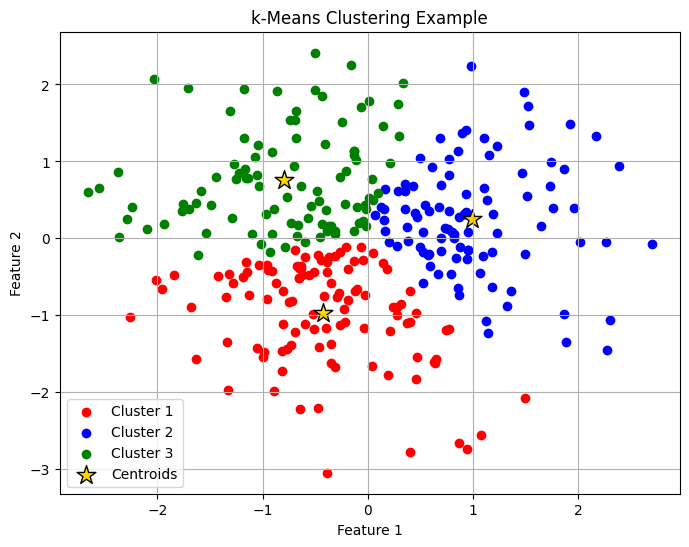

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Generating random data
np.random.seed(0)
data = np.random.randn(300, 2)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting the data points and centroids
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], color=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='gold', edgecolor='black', s=200, marker='*', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('k-Means Clustering Example')
plt.legend()
plt.grid(True)
plt.show()


- The data points are grouped into three clusters, each represented by a different color (red, blue, and green).
- The centroids of each cluster are marked with gold stars.
- The algorithm assigns each data point to the nearest cluster centroid.
- The positioning of centroids and the assignment of points to clusters are iteratively updated to minimize the total distance between points and their respective centroids.
- This visualization demonstrates how k-Means clustering organizes data points into distinct groups based on their features.


### Using the Make Swiss Roll Dataset

For our k-Means clustering project, we will use the "make Swiss roll" dataset to explore the algorithm's performance in identifying clusters within intricate data distributions. This dataset serves as an excellent example for demonstrating the capabilities of k-Means in capturing complex patterns and grouping data points effectively.

## Implementation

k=3

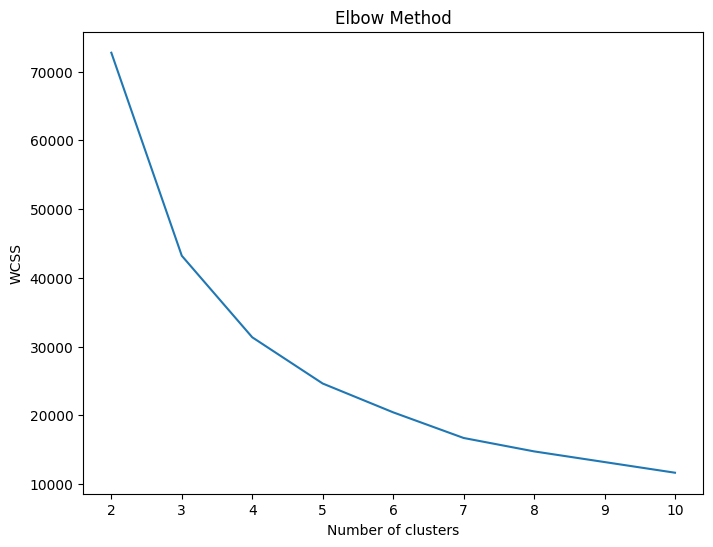

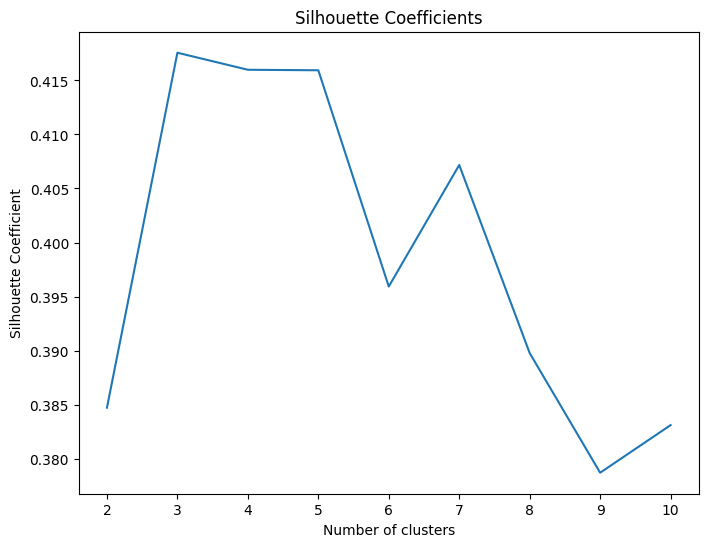

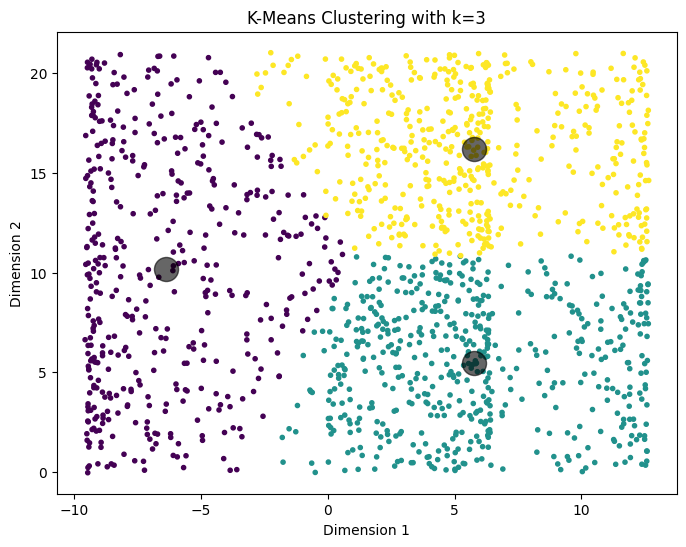

Silhouette Score for k=3: 0.4175623156711302


In [7]:
# Re-import necessary libraries since the environment was reset
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

# Generate the dataset
X, _ = make_swiss_roll(n_samples=1500, noise=0.05)

# Use the first two dimensions to simplify the problem.
X = X[:, :2]

# Determine the optimal number of clusters using the elbow method
wcss = []
silhouette_coefficients = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

# Plot the elbow method results
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_coefficients)
plt.title('Silhouette Coefficients')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

# Choose the number of clusters and fit the KMeans model
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Function to plot the clustered data
def plot_clusters(X, labels, centers, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='.')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6)
    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Plot the clusters
plot_clusters(X, kmeans.labels_, kmeans.cluster_centers_, f"K-Means Clustering with k={n_clusters}")

# Calculate and print silhouette score for chosen number of clusters
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score for k={n_clusters}: {silhouette_avg}")


k=5

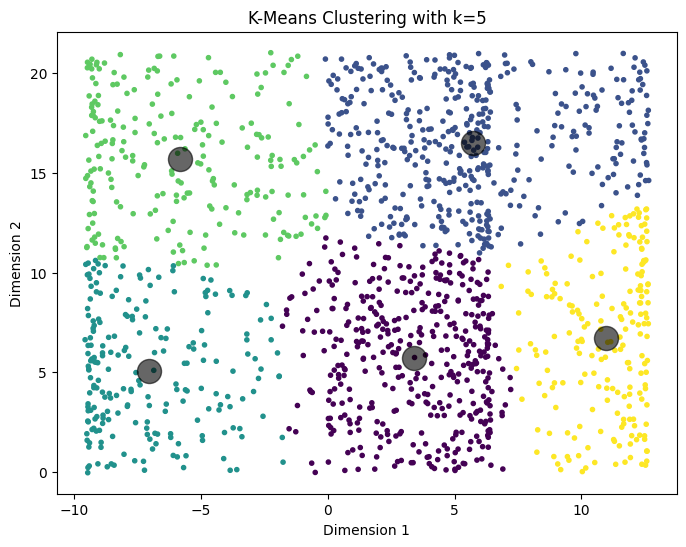

Silhouette Score for k=5: 0.41593856292404835


In [10]:
# Choose the number of clusters and fit the KMeans model
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Function to plot the clustered data
def plot_clusters(X, labels, centers, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='.')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6)
    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Plot the clusters
plot_clusters(X, kmeans.labels_, kmeans.cluster_centers_, f"K-Means Clustering with k={n_clusters}")

# Calculate and print silhouette score for chosen number of clusters
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score for k={n_clusters}: {silhouette_avg}")

k=10

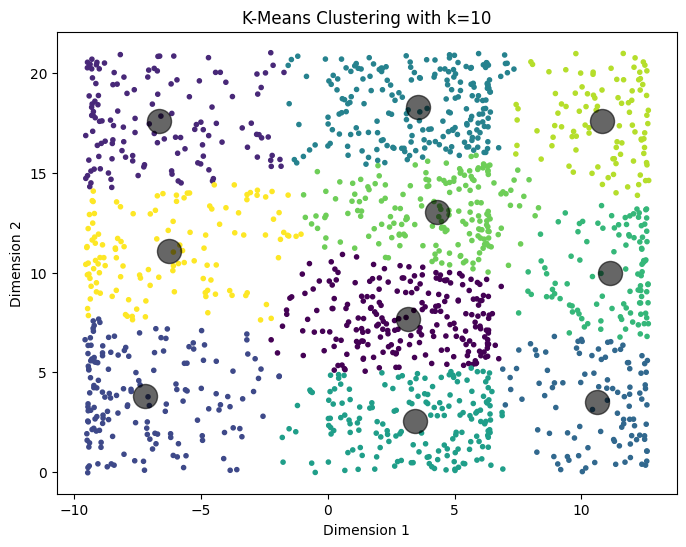

Silhouette Score for k=10: 0.38310708392431186


In [11]:
# Choose the number of clusters and fit the KMeans model
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Function to plot the clustered data
def plot_clusters(X, labels, centers, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='.')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6)
    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Plot the clusters
plot_clusters(X, kmeans.labels_, kmeans.cluster_centers_, f"K-Means Clustering with k={n_clusters}")

# Calculate and print silhouette score for chosen number of clusters
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score for k={n_clusters}: {silhouette_avg}")

# Silhouette Score Interpretation

The silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

## Results

- **Silhouette Score for k=3: 0.4175623156711302**
  With `k=3`, the silhouette score suggests moderate separation between clusters. Each data point is, on average, more similar to its own cluster than to others. This indicates that the clustering model has a fair structure when the data is divided into three clusters.

- **Silhouette Score for k=5: 0.41593856292404835**
  The score is almost unchanged from `k=3`, implying that increasing the clusters to five does not significantly improve the cluster structure. The clustering definition is not notably enhanced, suggesting that the data does not naturally partition into five distinct groups.

- **Silhouette Score for k=10: 0.38310708392431186**
  The reduction in the silhouette score as `k` increases to 10 signifies that the clusters have less cohesion and more overlap. The decrease indicates that the clustering structure is less distinct and that some clusters may be forced and not meaningful, making `k=10` a less suitable choice for the data.

## Conclusion

Considering the silhouette scores for different values of `k`, it appears that `k=3` offers a balance between cluster cohesion and separation. Thus, dividing the data into three clusters is potentially the most meaningful interpretation of the dataset's structure. The choice of `k` should also consider other factors, such as the context of the data and the specific use case of the clustering.
